# Polynomial Regression Using PyTorch (From Scratch)

When it comes to predictive analysis, regression models prove out to be on of the most cost efficient methods. While the linear regression model can provide some good predictions too, the polynomial regression sometimes proves out to perform better in certain situations over the linear regression models.

## Project Objectives

- Implementation of a machine learning model in **PyTorch** that uses the Polynomial Regression algorithm to make predictions.

We will create the model entirely from scratch, using basic PyTorch tensor operations.

- Using the model to conduct a predictive analysis of automobile price. At the end of the project, we aim at developing a highly efficient ML model that can predict the price of a car on the basis of its features.

- Performing visual & descriptive analysis of the data to predict which features play a key role in determining the price of a car.

## Importing the Project Dependencies

Before we begin working on the project, let us import all the necessary libraries and functions.

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us import the dataset. 

Here's the <a href="https://www.kaggle.com/goyalshalini93/car-data">link to the data set</a> if you plan to work on it yourself. 

I'll also link the github repo with the project notebook and the data set at the end of this article. 

In [2]:
# Loading the dataset into a pandas dataframe object
df = pd.read_csv('car_price.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Since a polynomial regression model can already be a bit too overwhelming for beginners, therefore, for the sake of simplicity, we will only be working with continuous variables in our project.

In [3]:
# Eliminating columns with categorical variables
df = df[['wheelbase', 'enginesize', 'carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',  'highwaympg', 'price']]

df.head()

,wheelbase,enginesize,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,130,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,130,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,152,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,109,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,136,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Wrangling

Now, let us analyze the data and see if it needs any cleaning or modifications. First, let us check the data types of each column of the dataframe.

In [4]:
# prints the data type of each column
df.dtypes

wheelbase           float64
enginesize            int64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

As we can see, some of the data is of the type *int64* while some of the type *float64*. Since we will be working with tensors, we might want a uniform data type throughout our feature set. As a result, we will cast the entire dataframe to *float64* at a later step.

Now, we will have a look at the  descriptive analysis of the dataframe.

In [5]:
# returns a table with the descriptive analysis of the entire dataframe
df.describe()

,wheelbase,enginesize,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,126.907317,174.049268,65.907805,53.724878,2555.565854,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,41.642693,12.337289,2.145204,2.443522,520.680204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,61.000000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,97.000000,166.300000,64.100000,52.000000,2145.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,120.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,141.000000,183.100000,66.900000,55.500000,2935.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,326.000000,208.100000,72.300000,59.800000,4066.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


As we can see, the data in different columns varies significantly in scale. We have elements in our data set of the order of 10<sup>0</sup> on the lower range and elements of the order of 10<sup>3</sup> on the upper range. **We might want to normalize the data**. We will see to this at a later step in our project.

## Feature Selection

Let us first plot the graph of each independent variabls against the target variable (quality).

In [6]:
# Function for plotting independent variables against target variable
# fig, a =  plt.subplots(3, figsize = (5, 5*3))
def plotter(column_list, target_col, df):
    """Plots scatterplot for each independent variable against the target variable
    
    Args-
        column_list- List containing names of all the independent variables
        target_col- Name of the target variable
        df- The dataframe
    Returns-
        None
    """
    len_col = len(column_list) #length of list of all the independent variables
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] #list of color values
    fig, axes = plt.subplots(len_col, figsize = (6, 6 * len_col)) #Creating a plot with subplots for each independant variable
    for col, ax in zip(column_list, axes): #The for loop goes through zipped list of column names and subplot and plots each plot
        ax.scatter(df[col], df[target_col], alpha = 0.3, c = np.random.choice(color))
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
    

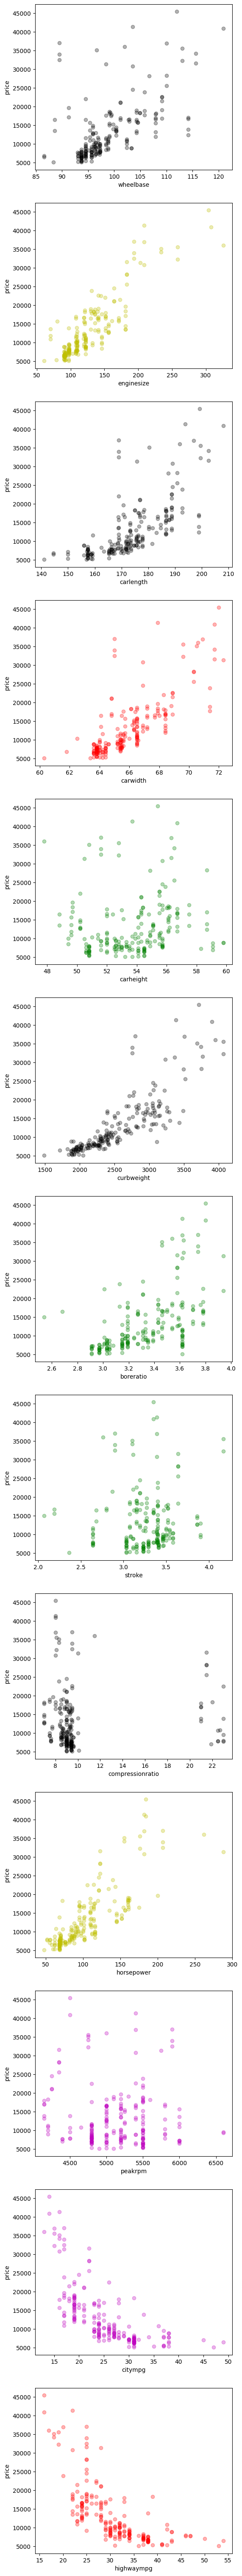

In [7]:
# creates a list of all the columns except the target column
cols_list = list(df.columns)
cols_list.remove('price')

# Target variable holds the name of the target variable
target_col = 'price'

plotter(cols_list, target_col, df)

Now, let us have a look at the correlation values for our dataset.

<Axes: title={'center': 'Correlation HeatMap'}>

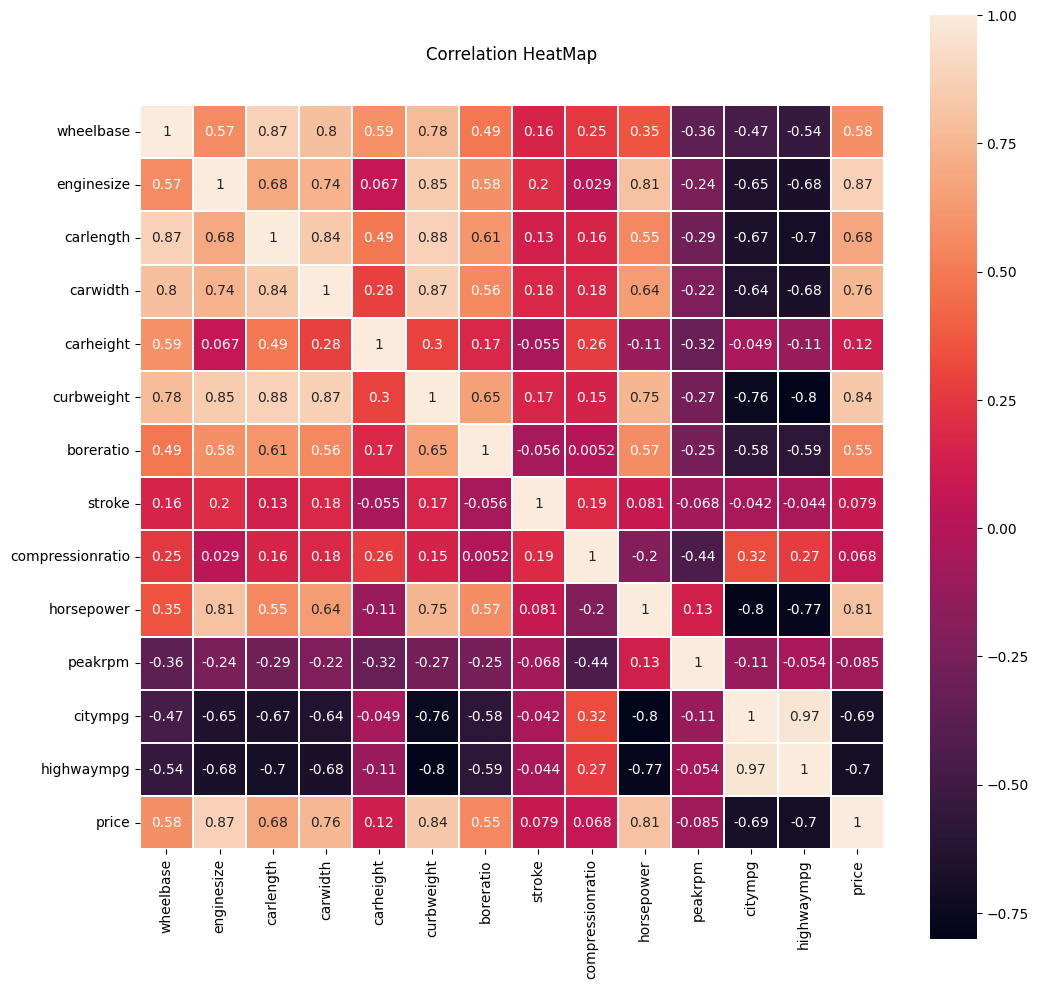

In [8]:
plt.figure(figsize=(12,12))
plt.title('Correlation HeatMap', y = 1.05)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

From the above visual analysis, we can clearly see that **enginesize** (++0.87), **curbweight** (+0.84) and **horsepower** (+0.81) show a very strong correlation with the dependent variable, **price**. 

**carwidth** (0.76), **citympg** (-0.69), **highwaympg** (-0.70) and **carlength** (0.68) contents of the wine show a relatively stronger correlation. So, for this example, we will be selecting these 7 as our training features.  

In [9]:
df = df[['enginesize', 'curbweight','horsepower', 'carlength', 'carwidth', 'citympg', 'highwaympg', 'price']].astype('float64')

# selecting the features
features = df[['enginesize', 'curbweight','horsepower', 'carlength', 'carwidth', 'citympg', 'highwaympg']]

# selecting the target
target = df['price']

print("Shape of features DF- {}\nShape of target series- {}".format(features.shape, target.shape))

Shape of features DF- (205, 7)
Shape of target series- (205,)


Now, we will work on formulating our model. But before we do that, first let us observe the plot of the features against the target once again.

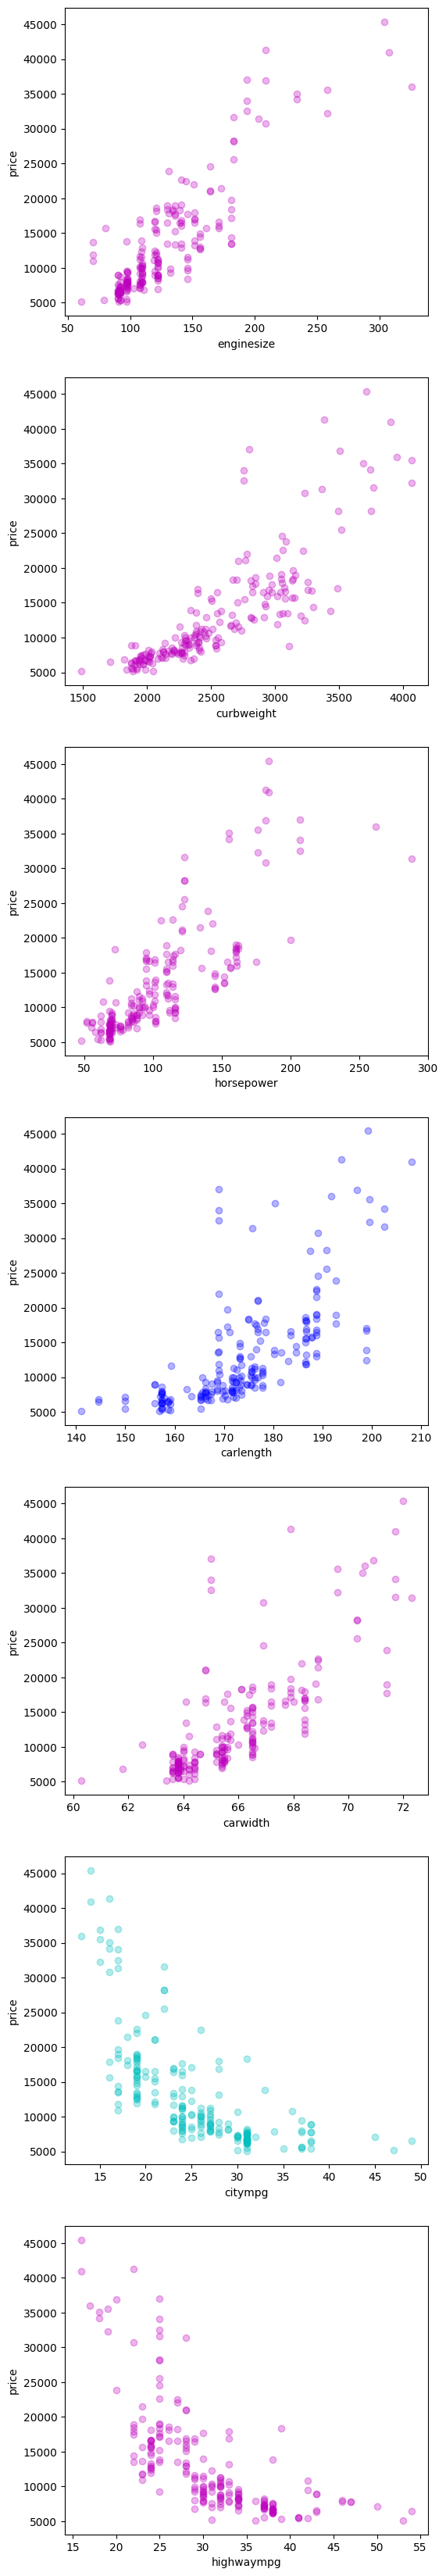

In [10]:
# Plotting the  data again
cols = list(features.columns)
target_col = 'price'
plotter(cols, target_col, df)

If we observe the graphs carefully, we will notice that the features enginesize, curbweight, horsepower, carlength and carwidth have a graph of the type **y = x<sup>2</sup>**.

On the other hand, citympg and highwaympg have a graph of the type **y = 1 / x<sup>2</sup>**. 

So we will deal with these features accordingly. 

## Formulating the Model from Scratch

Given below is the formulae our polynomial regression model will work on.

<img src="poly_reg1.jpg">

As we can see, a polynomial regression function can be substituted as a linear regression function  
<img src="poly_reg2.jpg">

Here,
- **ŷ**- Predicted values of the target variable
- **W**- It's a (1 x m) matrix containing all the weights associated with each polynomially transformed dependant variable
- **X**- A transpose of the matrix containing all the polynomially-transformed feature variables
- **B**- A (1 x m) matrix, each element of which is the bias value of our function.
- **m**- Number of rows in the training/test set
- **n**- Number of polynomially-transformed features

Let us now convert the feature (Pandas Dataframe object) and target (Pandas Series object) into tensor objects so we can use them to train our model with PyTorch.

In [11]:
# features_x2 are features with activation function of the type y = X2
features_x2 = features[['enginesize', 'curbweight', 'horsepower', 'carlength', 'carwidth']].to_numpy() # converting DF to numpy array
features_x2 = torch.from_numpy(features_x2) # converting numpy array to a pytorch tensor
print(features_x2.size())

# features_1byX2 are features with activation function of the type y = 1/X2
features_1byX2 = features[['citympg', 'highwaympg']].to_numpy() # converting DF to numpy array
features_1byX2 = torch.from_numpy(features_1byX2) # converting numpy array to a pytorch tensor
print(features_1byX2.size())

torch.Size([205, 5])
torch.Size([205, 2])


Now, for features with activation function of the type **y = x<sup>2</sup>**, we first create the x<sup>2</sup> features then concatenate it to our tensor object.

In [12]:
# For each independent variable x, a column of x-squared values will be added and concatenated
features_x2 = torch.cat((features_x2, features_x2 * features_x2), dim = 1)

features_x2.size()

torch.Size([205, 10])

Now, for features with activation function of the type **y = 1/x<sup>2</sup>**, we first create the 1/x<sup>2</sup> features then concatenate it to our tensor object.

In [13]:
# converts into 1/x form tensor
features_1byX2 = 1 / features_1byX2

# creates 1/x2 tensors and concats with 1/x tensor
features_1byX2 = torch.cat((features_1byX2, features_1byX2 * features_1byX2), dim = 1)

features_1byX2.size()

torch.Size([205, 4])

With this, we have polynomially transformed our features.

Now finally, we will concatenate all the transformed feature tensors into a single tensor object.

In [14]:
# Combines the x2 and 1/x2 type features into one tensor object
polyFeatures = torch.cat((features_x2, features_1byX2), dim = 1)

polyFeatures.size()

torch.Size([205, 14])

## Feature Scaling

Since we will be using Stochastic Gradient Descent (SGD) algorithm as the optimization algorithm for our model, scaling can significantly improve the optimization process and the performance of our model.  

In this project, we will be performing Min-Max Scaling. Min-max normalization converts the data such that all the values are between \[0,1\].

The mathermatical formula for min-max normalization is as follows:

<img src="minMaxScale.jpg">

Here, 
- **x** = Observed value
- **x<sub>min</sub>** = Minimum value observed in the column
- **x<sub>max</sub>** = Maximum value observed in the column
- **x<sub>scaled</sub>** = Scaled value


In [15]:
polyFeatures

tensor([[1.3000e+02, 2.5480e+03, 1.1100e+02,  ..., 3.7037e-02, 2.2676e-03,
         1.3717e-03],
        [1.3000e+02, 2.5480e+03, 1.1100e+02,  ..., 3.7037e-02, 2.2676e-03,
         1.3717e-03],
        [1.5200e+02, 2.8230e+03, 1.5400e+02,  ..., 3.8462e-02, 2.7701e-03,
         1.4793e-03],
        ...,
        [1.7300e+02, 3.0120e+03, 1.3400e+02,  ..., 4.3478e-02, 3.0864e-03,
         1.8904e-03],
        [1.4500e+02, 3.2170e+03, 1.0600e+02,  ..., 3.7037e-02, 1.4793e-03,
         1.3717e-03],
        [1.4100e+02, 3.0620e+03, 1.1400e+02,  ..., 4.0000e-02, 2.7701e-03,
         1.6000e-03]], dtype=torch.float64)

In [16]:
# function for normalizing data
def minMaxNormalizer(feature_tensor):
    """Takes the Torch.tensor object containing the features and performs min-max normalization on the Torch.tensor.
    The function iterates through each column and performs scaling on them individually.
    
    Args-
        feature_tensor- Tensor containing training features
    
    Returns-
        None
    """
    
    total_cols = feature_tensor.size()[1] # total unmber of columns 
    for i in range(total_cols): # iterating through each column
        feature_col = feature_tensor[:, i]
        maximum = torch.max(feature_col) # maximum stores max value of the column
        minimum = torch.min(feature_col) # minimum stores min value of the column
        feature_tensor[:, i] = (feature_tensor[:, i] - minimum) / (maximum - minimum) # min-max scalinng of each element of the column

In [17]:
# # Performing scaling on our feature dataframe
minMaxNormalizer(polyFeatures)

polyFeatures

tensor([[0.2604, 0.4112, 0.2625,  ..., 0.4211, 0.3365, 0.2887],
        [0.2604, 0.4112, 0.2625,  ..., 0.4211, 0.3365, 0.2887],
        [0.3434, 0.5178, 0.4417,  ..., 0.4534, 0.4279, 0.3189],
        ...,
        [0.4226, 0.5912, 0.3583,  ..., 0.5675, 0.4854, 0.4343],
        [0.3170, 0.6707, 0.2417,  ..., 0.4211, 0.1932, 0.2887],
        [0.3019, 0.6106, 0.2750,  ..., 0.4884, 0.4279, 0.3528]],
       dtype=torch.float64)

Now, we will create a tensor object that holds the weights associated with the polynomialised, normalized features. These weights are randomly generated and are very small.

In [18]:
# creating randomized weights 
weights = torch.rand(polyFeatures.size()[1], requires_grad = True)
weights

tensor([0.8116, 0.3589, 0.7488, 0.3441, 0.4468, 0.8604, 0.0954, 0.9948, 0.7525,
        0.2939, 0.7121, 0.0409, 0.4154, 0.8102], requires_grad=True)

Now, let us initialize a random bias for our model.

In [19]:
bias = torch.rand(1, requires_grad = True)
bias

tensor([0.8408], requires_grad=True)

Finally, convert the target array into a tensor.

In [20]:
# Convert target series into first numpy and the into a tensor
target = torch.from_numpy(target.to_numpy())
target

tensor([13495.0000, 16500.0000, 16500.0000, 13950.0000, 17450.0000, 15250.0000,
        17710.0000, 18920.0000, 23875.0000, 17859.1670, 16430.0000, 16925.0000,
        20970.0000, 21105.0000, 24565.0000, 30760.0000, 41315.0000, 36880.0000,
         5151.0000,  6295.0000,  6575.0000,  5572.0000,  6377.0000,  7957.0000,
         6229.0000,  6692.0000,  7609.0000,  8558.0000,  8921.0000, 12964.0000,
         6479.0000,  6855.0000,  5399.0000,  6529.0000,  7129.0000,  7295.0000,
         7295.0000,  7895.0000,  9095.0000,  8845.0000, 10295.0000, 12945.0000,
        10345.0000,  6785.0000,  8916.5000,  8916.5000, 11048.0000, 32250.0000,
        35550.0000, 36000.0000,  5195.0000,  6095.0000,  6795.0000,  6695.0000,
         7395.0000, 10945.0000, 11845.0000, 13645.0000, 15645.0000,  8845.0000,
         8495.0000, 10595.0000, 10245.0000, 10795.0000, 11245.0000, 18280.0000,
        18344.0000, 25552.0000, 28248.0000, 28176.0000, 31600.0000, 34184.0000,
        35056.0000, 40960.0000, 45400.00

Now, let us define the regression function.

In [21]:
# predicts the target values based on weights, features and bias variable
def polyRegression(features, weights, bias):
    """Performs polynomial regression on the features to predict target varaibles
    
    Args-
        features- Tensor containing polynomially-transformed features
        weights- tensor containing weights associated with each feature
        bias- Tensor containing the bias for the model
        
    Returns-
        y_hat- Predicted values for target variable
    """
    y_hat = (weights.float() @ features.t().float()) + bias.float() # @ denotes matrix multiplication; .t() transposes the tensor matrix
    return y_hat

# Used .float() method to cast all elements of tensor to floats to avoid any runtime errors

In [22]:
# Calculating predicted values for our feature set
predictions = polyRegression(polyFeatures, weights, bias)

# Size of the predictions tensor
predictions.size()

torch.Size([205])

In [23]:
# Size of our target tensor
target.size()

torch.Size([205])

Now, we will define our mean-squared error (**MSE**) function. MSE is one of the most commonly used methods to calculate the total model loss. Given below is the formula for calculation of MSE.

<img src="loss.jpg">

In [24]:
def meanSqrError(y, y_hat):
    """Calculates the total mean squared error for the model.
    
    Args- 
        y: Tensor of actual target values
        y_hat: Tensor of predicted target values
        
    Returns-
        total mean squared error
    """
    MSE = torch.sum((y - y_hat) ** 2) / torch.numel(y) 
    return MSE # MSE is a tensor object

In [25]:
# Calculating MSE for our model
print("Total MSE error = {}".format(meanSqrError(target, predictions)))

# Prints info abour the type of object our MSE function returns
print(meanSqrError(target, predictions))

Total MSE error = 239683135.77815625
tensor(2.3968e+08, dtype=torch.float64, grad_fn=<DivBackward0>)


As we can see, our model currently gives a very large MSE. Therefore, we need to optimize our model weights and biases to improve its performance. 

## Optimizing the Model

For optimizing our model, we will be using the Stochastic Gradient Descent (SGD) algorithm. Given below is the mathematics associated with the SGD optimizer algorithm.

<img src="SGD_1.jpg">
<img src="SGD_2.jpg">

For more information regarding SGD, kindly visit <a href="https://medium.com/bayshore-intelligence-solutions/why-is-stochastic-gradient-descent-2c17baf016de">this</a> link.

For our model however, we will be using the PyTorch's built-in gradient calculation functions. 

In [26]:
def stochGradDes(learning_rate, epochs, target, features, weights, bias):
    """Performs stochastic gradient descent optimization on the model.
    
    Args-
        learning_rate- Size of the step the function will take during optimization
        epochs- No. of iterations the function will run for on the model
        target- Tensor containing actual target values
        features- Tensor of independent variables
        weights- Tensor object containing weights associated with each feature
        bias- Tensor containinig model bias
    
    Returns-
        return_dict = {'weights': weights, 'bias': bias, 'MSE_list': MSE_list}
        where,
            weights- Latest weight calculated (tensor)
            bias- Latest bias calculated (tensor)
            MSE_list- Tensor object containing list MSE observed in each step    
    """

    MSE_list = torch.empty(0) #initiating an empty tensor
    for i in range(epochs):
        predictions = polyRegression(features, weights, bias) # Calculates predicted target values
        MSE = meanSqrError(target, predictions) # Calculates MSE for actual target and predictions
        MSE.backward() # MSE.backward() computes dMSE/dx for every parameter x which has requires_grad=True
        with torch.no_grad(): # Tells pytorch not to calculate grads while updating weights and bias values 
            weights -= weights.grad * learning_rate # weights.grad contains dMSE/d(weights)
            bias -= bias.grad * learning_rate # bias.grad contains dMSE/d(bias)
            weights.grad.zero_() # Sets weights.grad back to 0
            bias.grad.zero_() # Sets bias.grad back to 0
        MSE_list = torch.cat((MSE_list, MSE.reshape(1).float()), dim = 0) # Adds the MSE value for the epoch to MSE_list
        
    return_dict = {'weights': weights, 'bias': bias, 'MSE_list': MSE_list}
    return return_dict

In [27]:
# Running the optimizer for our model
optimizer = stochGradDes(0.1, 10000, target, polyFeatures, weights, bias)

In [28]:
optimizer['weights']

tensor([ 10031.4102,  -1321.9818,   4218.3828,  -4445.5771,    227.9268,
          9487.2471,  10624.7119,   2587.5789,   3971.8936,   6036.2725,
          -378.5476, -10305.2236,  14782.2578,   2156.7998],
       requires_grad=True)

In [29]:
optimizer['bias']

tensor([2161.6223], requires_grad=True)

In [30]:
optimizer['MSE_list'][-1]

tensor(10230442., grad_fn=<SelectBackward0>)

In [31]:
optimizer['MSE_list'].min()

tensor(10230442., grad_fn=<MinBackward1>)

Now, to check the accuracy of our model, we will calculate its r-squared score. The following is the formula for r2 score-
<img src="r2.jpg">


In [32]:
def r2_score(target, prediction):
    """Calculates the r2 score of the model
    
    Args-
        target- Actual values of the target variable
        prediction- Predicted values, calculated using the model
        
    Returns- 
        r2- r-squared score of the model
    """
    r2 = 1- torch.sum((target-prediction)**2) / torch.sum((target-target.float().mean())**2)
    return r2

Now, let us check the performance of our model. We will use the updated models and weights obtained by our optimizer function.

In [40]:
final_predictions = polyRegression(polyFeatures, optimizer['weights'], optimizer['bias'])

r2 = r2_score(target, final_predictions)
r2 = r2.detach()

print("r-squared score = {}".format(r2_score(target, final_predictions)))

r-squared score = 0.838917411577545


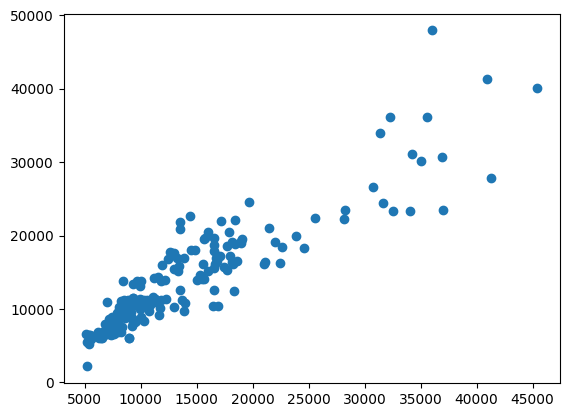

In [43]:
plt.scatter(target, final_predictions.detach())
plt.show()

As we can see, our polynomial regression model can explain around 83-84% of the variance for the dependent variable. This is a considerably efficient model.

##### One thing to be noted here is that we performed training and testing on the same dataset, which is a bad practice. Instead, you should split the feature dataset into test set and training set. However, in this example, while creating the model from scratch, I skipped the step to keep things simple and understandable.


In the end our project, let us plot the regression plot for all polynomially transformed features of our model.

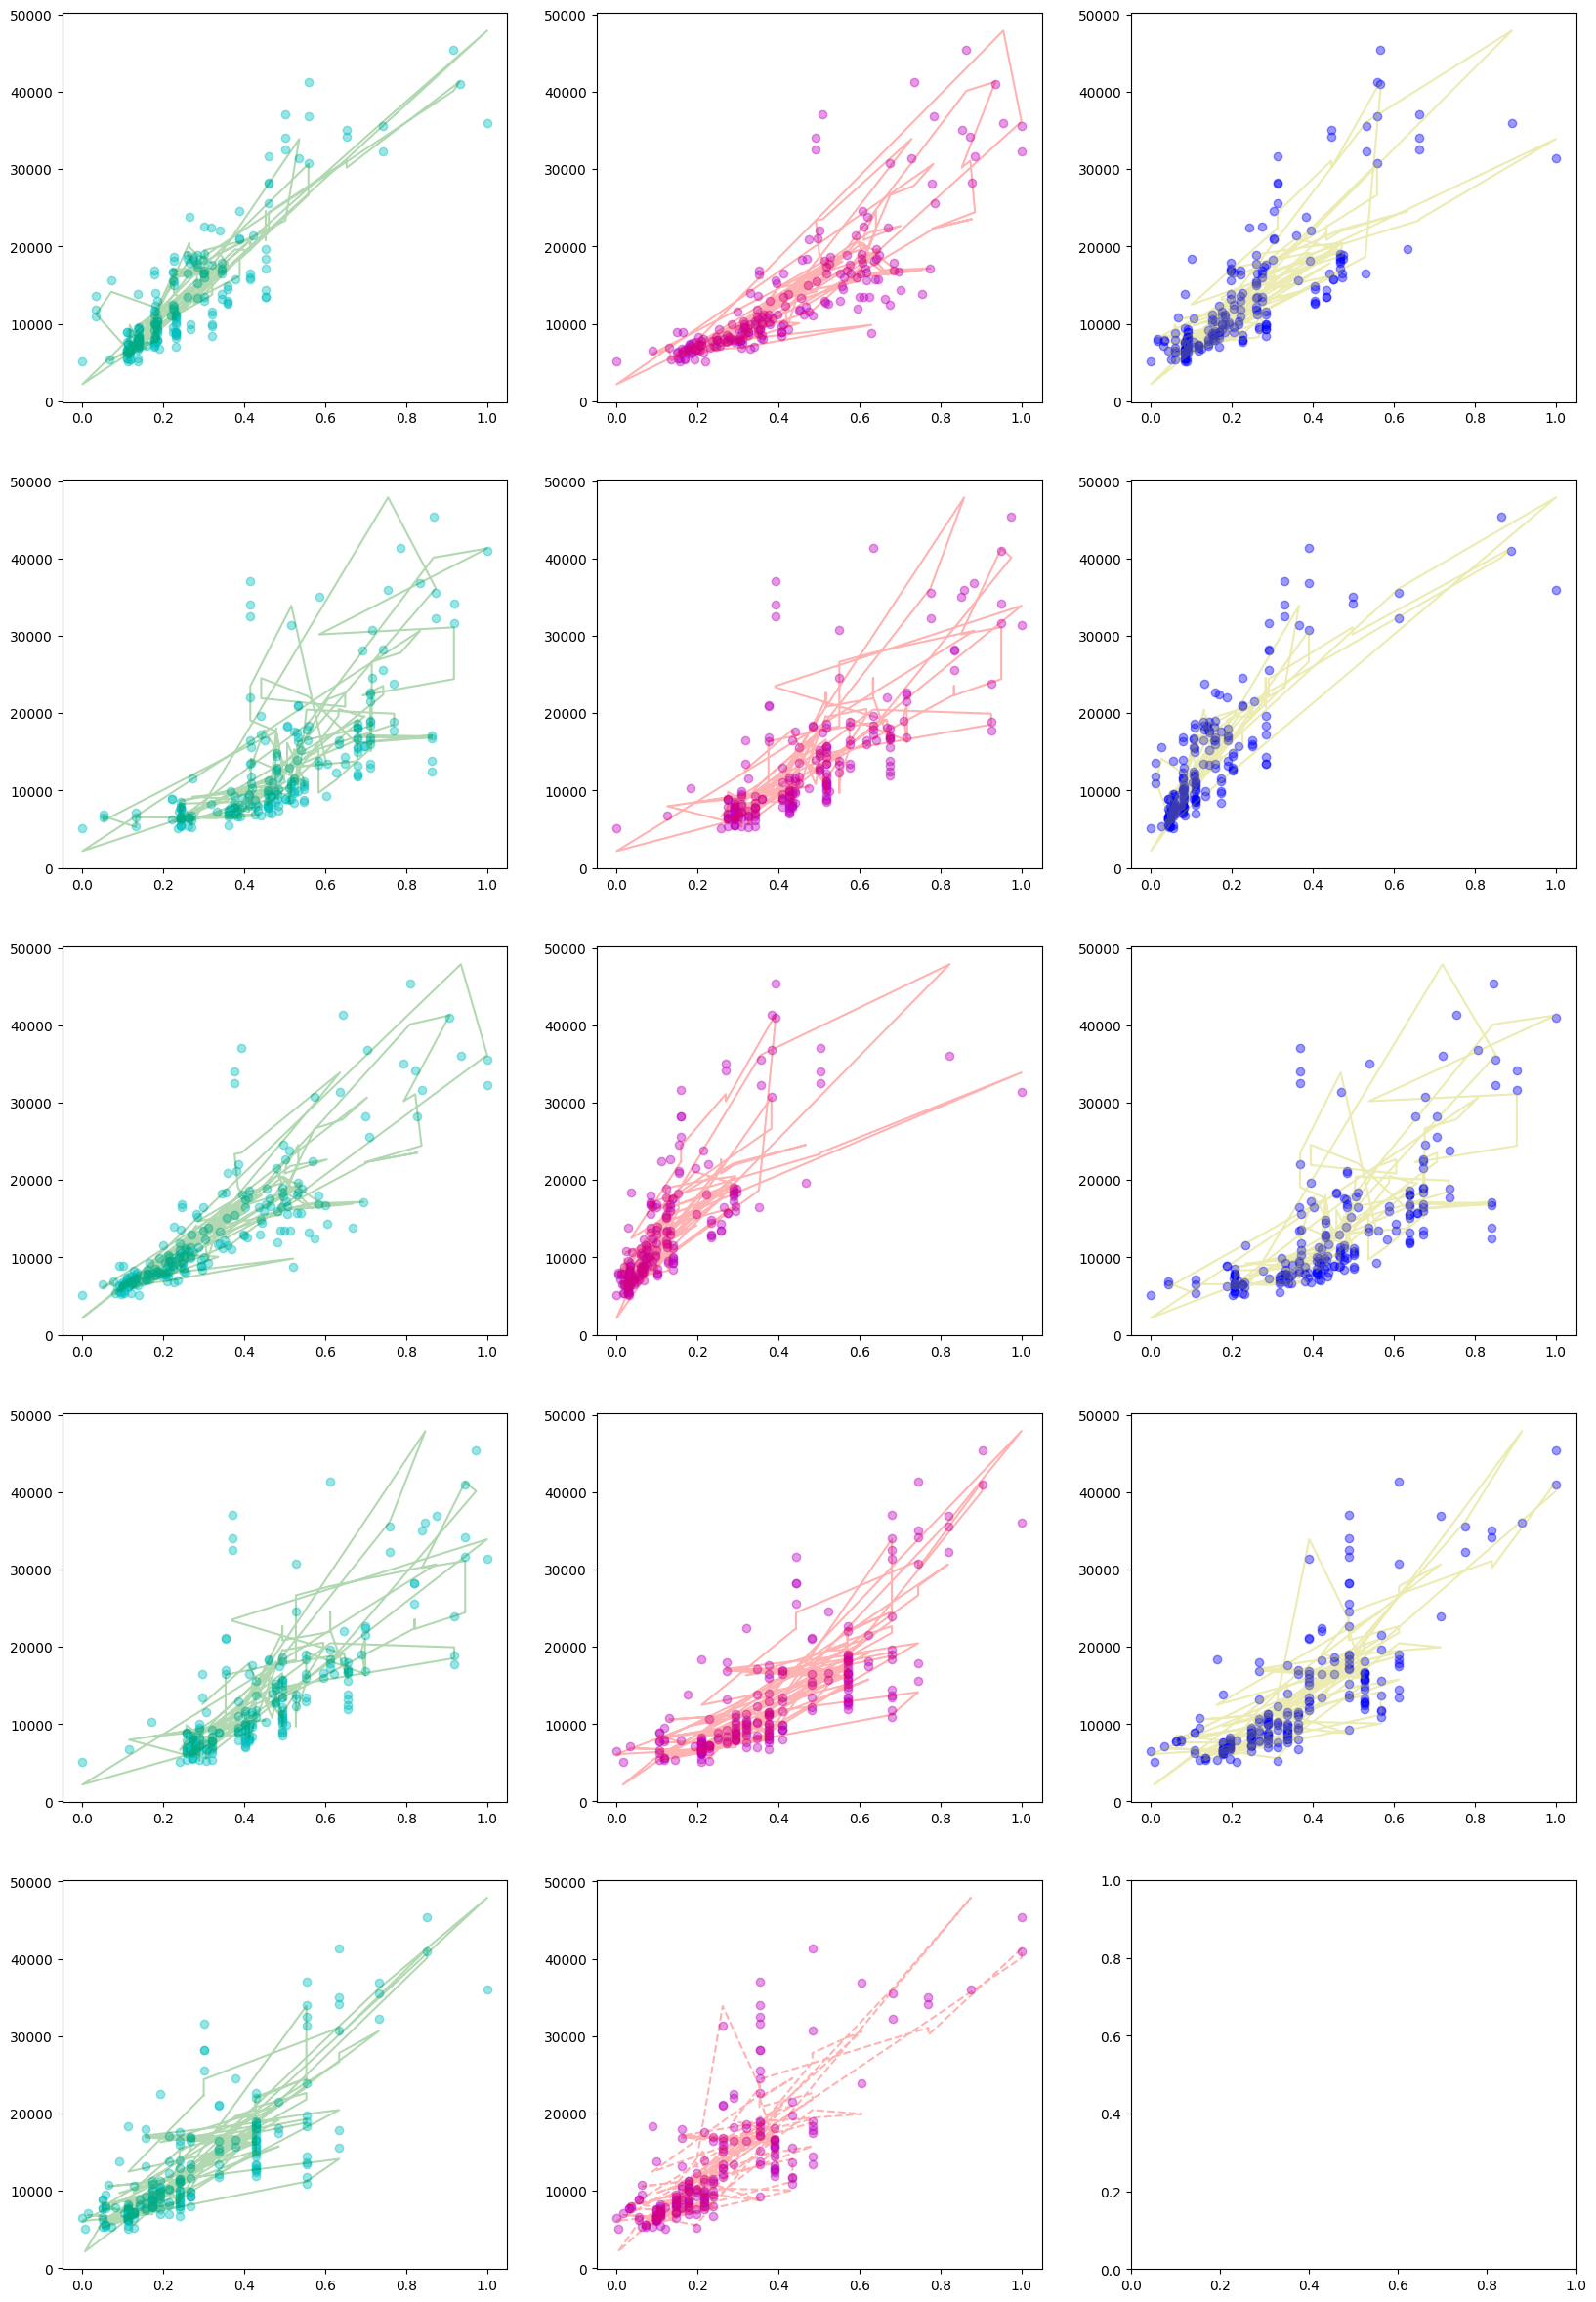

In [44]:
final_prediction = final_predictions.detach().numpy() #numpy array of final predictions
polyFeature = polyFeatures.numpy() #numpy array of polynomially transformed features
targets = target.numpy() #numpy array of actual target values
weights = optimizer['weights'].detach().numpy() #updated weights obtained by optimizer function
bias = optimizer['bias'].detach().numpy() #updated bias obtained by optimizer function

fig, a =  plt.subplots(5,3, figsize = (20, 30))

# plotting for 1st feature
a[0,0].scatter(polyFeature[:,0], target, color = 'c', alpha = 0.4)
a[0,0].plot(polyFeature[:,0], final_prediction, color = 'g', alpha = 0.3)

# 2nd feature
a[0,1].scatter(polyFeature[:,1], target, color = 'm', alpha = 0.4)
a[0,1].plot(polyFeature[:,1], final_prediction, color = 'r', alpha = 0.3)

# 3rd feature
a[0,2].scatter(polyFeature[:,2], target, color = 'b', alpha = 0.4)
a[0,2].plot(polyFeature[:,2], final_prediction, color = 'y', alpha = 0.3)

# 4th feature
a[1,0].scatter(polyFeature[:,3], target, color = 'c', alpha = 0.4)
a[1,0].plot(polyFeature[:,3], final_prediction, color = 'g', alpha = 0.3)

# 5th feature
a[1,1].scatter(polyFeature[:,4], target, color = 'm', alpha = 0.4)
a[1,1].plot(polyFeature[:,4], final_prediction, color = 'r', alpha = 0.3)

# 6th feature
a[1,2].scatter(polyFeature[:,5], target, color = 'b', alpha = 0.4)
a[1,2].plot(polyFeature[:,5], final_prediction, color = 'y', alpha = 0.3)

# 7th feature
a[2,0].scatter(polyFeature[:,6], target, color = 'c', alpha = 0.4)
a[2,0].plot(polyFeature[:,6], final_prediction, color = 'g', alpha = 0.3)

# 8th feature
a[2,1].scatter(polyFeature[:,7], target, color = 'm', alpha = 0.4)
a[2,1].plot(polyFeature[:,7], final_prediction, color = 'r', alpha = 0.3)

# 9th feature
a[2,2].scatter(polyFeature[:,8], target, color = 'b', alpha = 0.4)
a[2,2].plot(polyFeature[:,8], final_prediction, color = 'y', alpha = 0.3)

# 10th               
a[3,0].scatter(polyFeature[:,9], target, color = 'c', alpha = 0.4)
a[3,0].plot(polyFeature[:,9], final_prediction, color = 'g', alpha = 0.3)

# 11th
a[3,1].scatter(polyFeature[:,10], target, color = 'm', alpha = 0.4)
a[3,1].plot(polyFeature[:,10], final_prediction, color = 'r', alpha = 0.3)

# 12th
a[3,2].scatter(polyFeature[:,11], target, color = 'b', alpha = 0.4)
a[3,2].plot(polyFeature[:,11], final_prediction, color = 'y', alpha = 0.3)

# 13th
a[4,0].scatter(polyFeature[:,12], target, color = 'c', alpha = 0.4)
a[4,0].plot(polyFeature[:,12], final_prediction, color = 'g', alpha = 0.3)

# 14th
a[4,1].scatter(polyFeature[:,13], target, color = 'm', alpha = 0.4)
a[4,1].plot(polyFeature[:,13], final_prediction, "--",color = 'r', alpha = 0.3)

From the above graphs, we can see our model is performing pretty good.